# Visualisation Project Report - Google Play Store

## Installation and Imports

Running the following inside the notebook will install all required packages. If the packages are already available, then a message will appear to confirm this.

In [ ]:
!pip install numpy 
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [568]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Datasets
The two datasets are need to be read in and I will display the first 5 records.

In [569]:
# Use pandas read_csv() method to read the csv and display first 5 records
google_store = pd.read_csv('googleplaystore.csv')
google_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [570]:
# Use pandas read_csv() method to read the csv and display first 5 records
google_store_reviews = pd.read_csv('googleplaystore_user_reviews.csv')
google_store_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## Data Cleaning 

Certain checks can be done on the dataset to see if there are any NaN, null or duplicated values that need to be dealt with before beginning to analyse the data and draw insights. 

### google_store - Data Cleaning

In [571]:
# Check to see the total number of duplicates in the google_store dataset
google_store.duplicated().sum()

483

In [572]:
# Drop the duplicates and assign the result to a new variable
google_store_no_duplicates = google_store.drop_duplicates()

In [573]:
# Check to see the total number of null values in the google_store dataset
google_store_no_duplicates.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [574]:
# Check to see the total number of NaN values in the google_store dataset
google_store_no_duplicates.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [575]:
# Drop the NaN values and assign the result to a new variable
google_store_no_nan = google_store_no_duplicates.dropna()

In [576]:
# Remove the '+' symbol character from 'Installs' coulmn
google_store_no_nan.loc[:,'Installs'] = google_store_no_nan['Installs'].str.replace('+', '')

# Remove the ',' character from the 'Installs' column
google_store_no_nan.loc[:,'Installs'] = google_store_no_nan['Installs'].str.replace(',', '')

# Convert the 'Installs' column to an integer
google_store_no_nan.loc[:,'Installs'] = google_store_no_nan['Installs'].astype(int)

In [577]:
# Assign the cleaned dataset to a new variable
google_store_cleaned = google_store_no_nan

In [578]:
google_store_cleaned.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


The **google_store_cleaned** variable now contains the cleaned dataset that does not include duplicated records or null records. It was important to drop the null and NaN records in the rating because this would skew the insights when making plots. The string characters were also removed from the 'Installs' column which was neccessary as the integer value would be used for analysis only. 

### google_store_reviews - Data Cleaning

In [579]:
# Check to see the total number of duplicates in the google_store_reviews dataset
google_store_reviews.duplicated().sum()

33616

In [580]:
# Drop the duplicates and assign the result to a new variable
google_store_reviews_no_duplicates = google_store_reviews.drop_duplicates()

In [581]:
# Check to see the total number of null values
google_store_reviews_no_duplicates.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [582]:
# Check to see the total number of NaN values
google_store_reviews_no_duplicates.isna().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [583]:
# Drop the NaN values and assign the result to a new variable
google_store_reviews_cleaned = google_store_reviews_no_duplicates.dropna()

In [584]:
# Select entire Sentiment Polarity and Sentiment Subjectivity columns and round the values to 2.d.p
google_store_reviews_cleaned.loc[:, 'Sentiment_Polarity'] = google_store_reviews_cleaned['Sentiment_Polarity'].round(2)
google_store_reviews_cleaned.loc[:, 'Sentiment_Subjectivity'] = google_store_reviews_cleaned['Sentiment_Subjectivity'].round(2)

In [585]:
google_store_reviews_cleaned.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.29
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.88
4,10 Best Foods for You,Best idea us,Positive,1.00,0.30
5,10 Best Foods for You,Best way,Positive,1.00,0.30


The **google_store_reviews_cleaned** variable now contains the cleaned dataset. The dataset for the google reviews showed the 'Most Relevant' 100 reviews for each app. There are records with complete NaN entries in them - one reason could be that certain apps do not have 100 reviews in total, in any case, there are records that are entered that are of complete NaN values that have to be removed. To keep uniformity and consistency, the float number for the 'Sentiment Polarity' and 'Sentiment Subjectivity' is standardised to 2.d.p.

Further cleaning can be performed so that every column can be fit for analysis, however, I have only cleaned the data that shall appear in the following visualisations.

## Visualisations

### Average Number of Installs vs Type of App

I will compare the average number of installs with the type of app it is to see what the data suggests, whether applications that are free or paid result in a greater number of installs. 

#### Analysis

In [586]:
# Calculate the average number of installs for both types of app and assign these to variables
avg_installs_free = google_store_cleaned[google_store_cleaned['Type'] == 'Free']['Installs'].mean()
avg_installs_paid = google_store_cleaned[google_store_cleaned['Type'] == 'Paid']['Installs'].mean()

In [587]:
# Create a new dataframe with the type of app and the average number of installs
avg_installs_df = pd.DataFrame({'Type': ['Free', 'Paid'], 'Average_Installs': [avg_installs_free, avg_installs_paid]})

Text(0, 0.5, 'Average Number of Installs (*e7)')

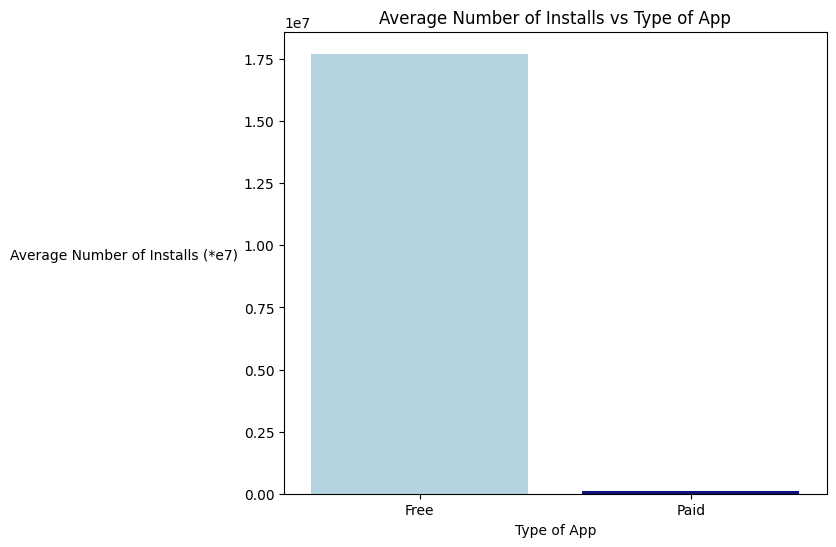

In [626]:
# Plot a barplot using seaborn, catergorise by type, change the colour palette and set the title and labels
# Use matplotlob to set the size and rotate the y-axis label
plt.figure(figsize=(7, 6))
sns.barplot(x='Type', y='Average_Installs', data=avg_installs_df, hue='Type', palette=('lightblue', 'darkblue')).set(
    title='Average Number of Installs vs Type of App', 
    xlabel='Type of App', 
    ylabel='Average Number of Installs (*e7)')

plt.ylabel('Average Number of Installs (*e7)', rotation=0, ha='right')

#### Conclusion

The data shows an overwhelmingly dominant result for free apps. The data clearly demonstrates that apps which are free result in a greater number of installations when compared against paid apps. There is no data here to suggest that the free apps will be more profitable or to a higher degree of user satisfaction, but conclusions can be made due to the tremendous gap that shows that businesses should look to increase user engagement by focusing on developing apps that are free, which would lead to more installations and then strategizing monetisation from there. This includes in-app purchases or targeted ads as an example.

### Average Ratings across all Categories 

I will compare the distribution of ratings across all the categories to compare what category of application tends to do well by receiving higher ratings and what category does not perform well by receiving lower ratings on the Google Play Store.

#### Analysis

In [589]:
# Calculate the average rating grouped by category and create a new dataframe to hold this data
avg_rating_by_category = google_store_cleaned.groupby('Category')['Rating'].mean().reset_index()
avg_rating_by_category.head()

,Category,Rating
0,ART_AND_DESIGN,4.377049
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.347458
4,BUSINESS,4.102593


([<matplotlib.axis.XTick at 0x1d060ae64b0>,
 [Text(3.5, 0, '3.5'), Text(4.0, 0, '4.0'), Text(4.5, 0, '4.5')])

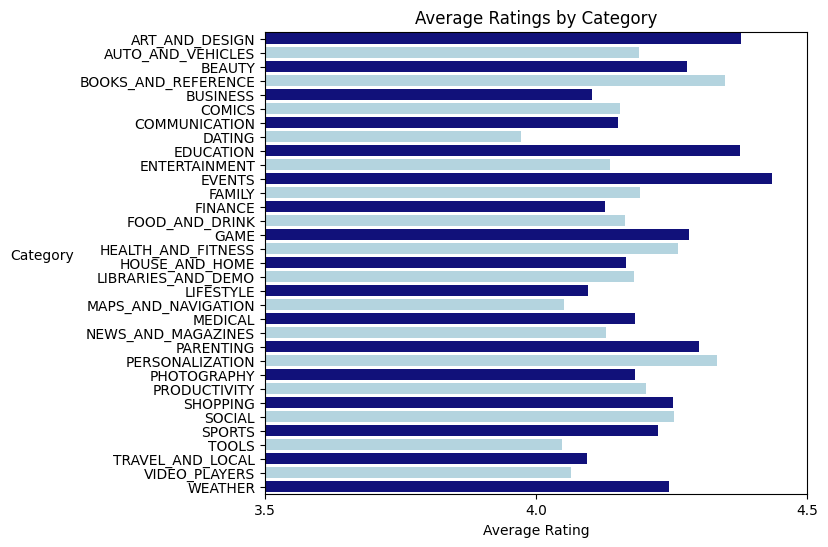

In [628]:
# Plot a barplot using seaborn, change the colour palette and set the title and labels
# Use matplotlob to set the size, rotate the y-axis label, change the range of the x values and set the new ticks
plt.figure(figsize=(7, 6))
sns.barplot(x='Rating', y='Category', data=avg_rating_by_category, hue="Category", palette=('darkblue', 'lightblue')).set(
    title='Average Ratings by Category',
    xlabel='Average Rating',
    ylabel='Category'
)
plt.ylabel('Category', rotation=0, ha='right')
plt.xlim(3.5, 4.5)
plt.xticks([3.5, 4, 4.5])

#### Conclusion

The data shows that the best rated apps by users are from the 'Events' category. Other apps that rated highly came from categories that include 'Education' and 'Art and Design'. The lowest rated apps came from the 'Dating' category and other lower rated apps came from categories that include 'Maps and Navigation', 'Tools' and 'Video Players'. Using this data, businesses can make informed decisions on the higher user rated apps they can develop, invest in or place targerted advertisements inside. Business can also see the lower rated apps and use the user feedback to develop apps that would do well in those those categories or producde updates to satisfy user concerns. 

### Distribution of Sentiment by Users

I will compare scores regarding Sentiment rated by users and the result of the split of positive and negative reviews and what frequency of polarity rating is most common across categories.

#### Analysis

In [645]:
# Count the different values (positive, negative and neutral) of sentiment and collect this to a new variable
sentiment_counts = google_store_reviews_cleaned['Sentiment'].value_counts()

Text(0.5, 1.0, 'Distribution of Sentiment in User Reviews')

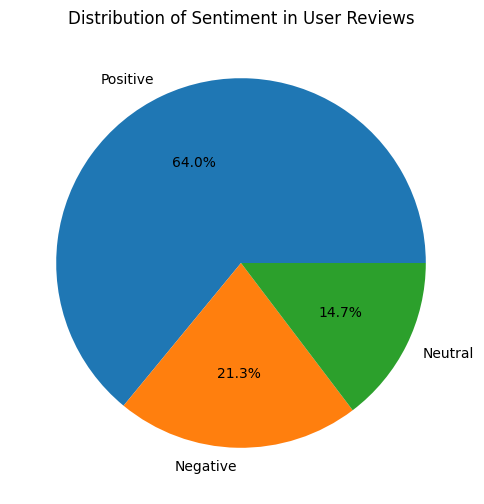

In [646]:
# plot piechart and display the labels as percentages 
plt.figure(figsize=(7, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment in User Reviews')

In [647]:
# join the two datasets togther on app and display the category names
merged_data = pd.merge(google_store_reviews_cleaned, google_store_cleaned[['App', 'Category']], on='App', how='inner')

In [649]:
# cross tabulation of categories and sentiment polarity score and assigned to a new variable
polarity_count_by_category = pd.crosstab(merged_data['Category'], pd.cut(merged_data['Sentiment_Polarity'], bins=10))

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '(-1.002, -0.8]'),
  Text(1.5, 0, '(-0.8, -0.6]'),
  Text(2.5, 0, '(-0.6, -0.4]'),
  Text(3.5, 0, '(-0.4, -0.2]'),
  Text(4.5, 0, '(-0.2, 0.0]'),
  Text(5.5, 0, '(0.0, 0.2]'),
  Text(6.5, 0, '(0.2, 0.4]'),
  Text(7.5, 0, '(0.4, 0.6]'),
  Text(8.5, 0, '(0.6, 0.8]'),
  Text(9.5, 0, '(0.8, 1.0]')])

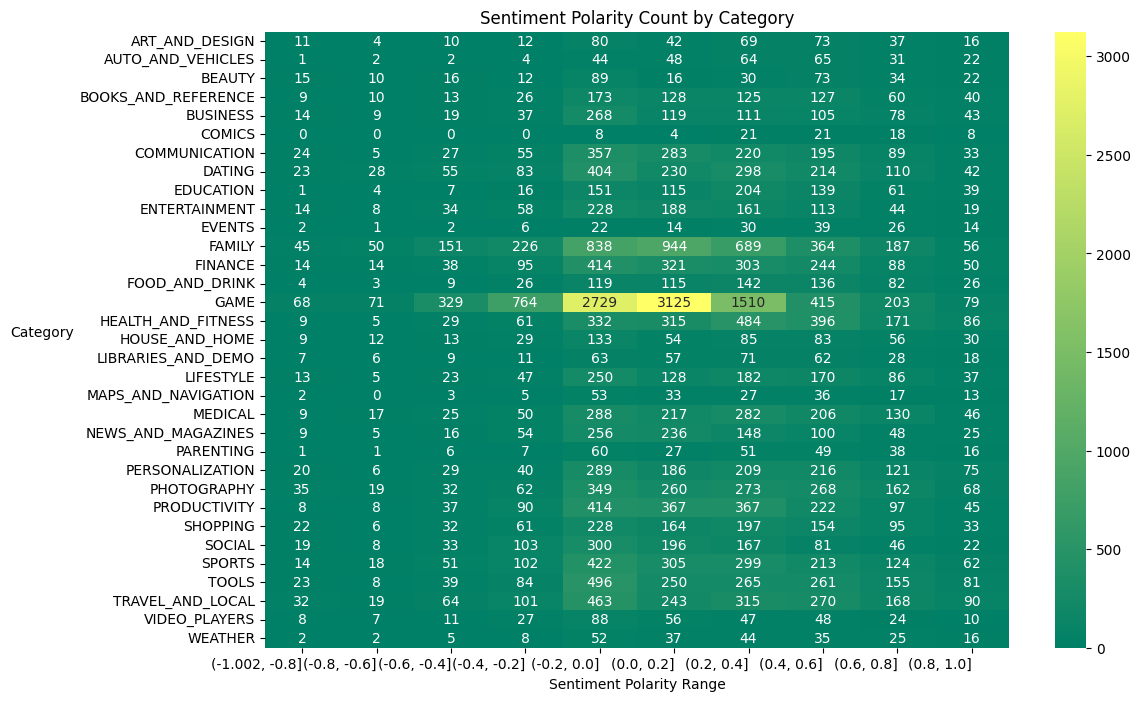

In [651]:
# plot heatmap, set colour theme, fix label position and set axis laels
plt.figure(figsize=(12, 8))
sns.heatmap(polarity_count_by_category, cmap='summer', annot=True, fmt='d').set(
    title='Sentiment Polarity Count by Category',
    xlabel='Sentiment Polarity Range',
    ylabel='Category'
)

plt.ylabel('Category',rotation=0, ha='right')
plt.xticks(rotation=0, ha='right')

#### Conclusion

The pie chart data shows that 64% of reviews that are left by users are positive which shows that users are most likely to leave reviews when they are satisfied with the app. 14.7% and 21.3% of reviews were neutral and negative which is a significant number of reviews which means that businesses that develop the apps should take a close look into the reasons these reviews were not satisfactory and use the information to provide app updates and implement changes that would increase user satisfaction. 
The heatmap daa shows the frequency of sentiment polarity ratings across different app categories. Looking at the data most reviews fall between the -0.02-0.0 to 0.3-0.5 polarity ranges which shows that there is little no to strong bias when it comes to user reviews and indicates are most reviews are mild sentiments. By looking further into the scores across different categories, the 'Game' category shows the highest amount of sentiment scores falling into the common range of -0.02 to 0.04 which shows most scores are slightly positive, with a significant frequency of scores that are neutral and slightly negative. As this was the most common range, this suggests businesses should provide greater customer support and user feedback which would overall increase user satisfaction and engagement.